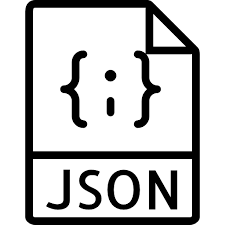

# Learning Objectives

- Load and explore a .json file in Python
- Create a clean data structure from a .json file
- Conduct descriptive analysis
- Visualize the results

Part of being a good data scientist is having the capacity to work with data in many different forms. Much data online is stored in JSON format. So let's see if we can conduct a descriptive analysis of data when it's given to us in that form!

## What is JSON?

JSON stands for Java Script Object Notation. 

JSON objects are one common way that data is transmitted over the web.  It is notable for being lightweight, which makes it [preferred](https://stackoverflow.com/questions/383692/what-is-json-and-why-would-i-use-it), generally, over XML.

```json
{"menu": {
  "id": 12412,
  "istest": true,
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}
    ]
  }
}}
```

## JSON Format

JSON objects store data in a format similar to a nested Python dictionary. The JSON format makes it easy to store as a file, transfer between users, and use in other languages.

For more information about the syntax of JSON files, check out this [link](https://www.json.org/json-en.html) to the JSON website.

Can have these types in it (all relatable to Python types):

|JavaScript|JS Example               |Python Equivalent|Python Example           |
|----------|-------------------------|-----------------|-------------------------|
|Objects   |`{'key0':'v12','v':1}`   |Dictionaries     |`{'key0':'v12','v':1}`   |
|Arrays    |`[1, 'one', 'two', 3, 5]`|Lists            |`[1, 'one', 'two', 3, 5]`|
|Strings   |`'One'` or `"Two"`       |Strings          |`'One'` or `"Two"`       |
|Numbers   |`1234.5` or `8675309`    |Numbers          |`1234.5` or `8675309`    |  
|Boolean   |`true` or `false`        |Boolean          |`True` or `False`        |
|Null Value|`null`                   |None Value       |`None`                   |

# Loading a JSON File

For this example, we've created a `new_releases.json` file containing data on 20 newly released music albums. We got this from the Spotify API - we'll explain what this means later. 

Let's begin by importing the `json` package, opening a file with python's `open()` function, and then loading that data from the JSON file into a new `data` object.

In [1]:
# We'll need to import the json package first
import json

In [2]:
# Now use with open to load the file
with open('data/new_releases.json') as file:
    data = json.load(file)

In [ ]:
open_file = open('data/new_releases.json')
data = json.load(open_file)
open_file.close()

In [122]:
type(data)

dict

The Spotify API returned the data in the form of JSON object, which the `json` module transforms into a Python object.

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The deepest levels of our object will contain individual values: numbers, booleans or strings. These in turn will be stored in the equivalents of Python lists and dictionaries, usually with many levels of nesting. 

If you try to look at a raw JSON file, you will likely have a hard time understanding the structure. To more easily make sense of it, we will proceed through each level methodically.

In [4]:
# This will look messy
print(data)

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6lit'}, 'href'

In [5]:
# One way to make it easier to read
print(json.dumps(data, indent=2))

{
  "albums": {
    "href": "https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20",
    "items": [
      {
        "album_type": "album",
        "artists": [
          {
            "external_urls": {
              "spotify": "https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i"
            },
            "href": "https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i",
            "id": "1RyvyyTE3xzB2ZywiAwp0i",
            "name": "Future",
            "type": "artist",
            "uri": "spotify:artist:1RyvyyTE3xzB2ZywiAwp0i"
          }
        ],
        "available_markets": [
          "AD",
          "AE",
          "AR",
          "AT",
          "AU",
          "BE",
          "BG",
          "BH",
          "BO",
          "BR",
          "CA",
          "CH",
          "CL",
          "CO",
          "CR",
          "CY",
          "CZ",
          "DE",
          "DK",
          "DO",
          "DZ",
          "EC",
          "EE",
          "EG",
       

In [6]:
# Using the default Jupyter Notebook's display() helps
display(data) 
# Uncomment this to do the same as just displaying the last line
# data

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     

To start exploring, let's check the type of our new `data` object and start mapping out the hierarchy.

In [7]:
# How can we access the keys?
data.keys()

dict_keys(['albums'])

In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

In [ ]:
data.get('albums')

In [ ]:
type(data.get('albums'))

In [8]:
data.get('albums').keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

At this point, things are starting to look something like this: 

![](images/json_diagram1.jpg)

If we were to continue checking individual data types, we'd have a lot to go through. To simplify this, let's use a `for` loop:

In [9]:
for key, value in data['albums'].items():
    print(key, type(value))

href <class 'str'>
items <class 'list'>
limit <class 'int'>
next <class 'str'>
offset <class 'int'>
previous <class 'NoneType'>
total <class 'int'>


Adding this to our diagram, we now have something like this:

![](images/json_diagram2.jpg)

Let's look at the `items` list - this contains the album information. 

In [10]:
type(data['albums']['items'])

list

In [ ]:
data[0]

In [12]:
data['albums'][0]

KeyError: 0

In [11]:
# How can I grab the first entry?
data['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

We access values as we would for nested lists or dictionaries in Python.

In [13]:
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [14]:
# Lets get the artist name
data['albums']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
  'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
  'id': '1RyvyyTE3xzB2ZywiAwp0i',
  'name': 'Future',
  'type': 'artist',
  'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}]

In [16]:
type(data['albums']['items'][0]['artists'])

list

In [ ]:
len(data['albums']['items'][0]['artists'])

In [15]:
data['albums']['items'][0]['artists'][0]['name']

'Future'

In [ ]:
# Name of 2nd album artist
data['albums']['items'][1]['artists'][0]

In [ ]:
data['albums']['items'][0].keys()

In [ ]:
data['albums']['items'][1]['name']

In [18]:
albums = data['albums']['items']

In [19]:
len(albums)

20

In [20]:
albums[0]

albums[0]["artists"][0]["name"]

'Future'

# Loading in Plant Data

Now that we have a handle on how to deal with data in JSON form, let's load in a new dataset and construct an analysis!

In [21]:
with open('data/plants.json') as f:
    plants = json.load(f)

This dataset was gathered with the [Trefle API](https://docs.trefle.io/). It contains information about 1000 plants in JSON form.

In [22]:
type(plants)

list

In [23]:
# How many entries should we have? We can sanity check
len(plants)

1000

In [24]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

## What Information Do We Have?

Let's take a look at the first plant in our list to see what information is available.

In [ ]:
# First plant
plants[0]

In [25]:
plants[0].keys()

dict_keys(['id', 'common_name', 'slug', 'scientific_name', 'year', 'bibliography', 'author', 'status', 'rank', 'family_common_name', 'genus_id', 'image_url', 'synonyms', 'genus', 'family', 'links'])

You can find more information about these fields [here](https://docs.trefle.io/docs/advanced/plants-fields).

## Plant Families

Let's start by seeing what botanical families are represented in our data. We'll build a dictionary that counts the plants by family. We'll use the common names for this purpose.

In [26]:
# Let's use a default dict for this - need to import it first!
from collections import defaultdict, Counter

In [27]:
plant_dict = defaultdict(int)
plant_dict

defaultdict(int, {})

In [28]:
family_names = [plant['family_common_name'] for plant in plants]
family_names

['Beech family',
 'Nettle family',
 'Grass family',
 'Plantain family',
 'Beech family',
 'Grass family',
 'Buttercup family',
 'Grass family',
 'Pea family',
 'Olive family',
 'Rose family',
 'Pea family',
 'Buttercup family',
 'Birch family',
 'Beech family',
 'Rush family',
 'Buckwheat family',
 'Grass family',
 'Rose family',
 'Soapberry family',
 'Plantain family',
 'Grass family',
 'Pine family',
 'Pea family',
 'Grass family',
 'Mint family',
 'Rose family',
 'Madder family',
 None,
 'Grass family',
 'Pink family',
 'Birch family',
 'Grass family',
 'Birch family',
 'Carrot family',
 'Geranium family',
 'Grass family',
 'Rose family',
 'Grass family',
 'Mint family',
 'Grass family',
 'Grass family',
 None,
 'Rose family',
 'Aster family',
 'Aster family',
 'Beech family',
 'Carrot family',
 'Carrot family',
 'Aster family',
 'Horsetail family',
 'Rose family',
 'Pine family',
 'Grass family',
 'Plantain family',
 'Heath family',
 'Loosestrife family',
 'Grass family',
 'Aster f

In [29]:
len(family_names)

1000

In [30]:
unique_names = set(family_names)

In [31]:
plant_dict2 = {name: 0 for name in unique_names}
plant_dict2

{'Sumac family': 0,
 'Poppy family': 0,
 'Potato family': 0,
 'Nettle family': 0,
 None: 0,
 'Tape-grass family': 0,
 'Buckthorn family': 0,
 'Leadwort family': 0,
 'Manatee-grass family': 0,
 'Rose family': 0,
 'Yam family': 0,
 'Honeysuckle family': 0,
 'Water-lily family': 0,
 'Purslane family': 0,
 'Holly family': 0,
 'Elm family': 0,
 'Morning-glory family': 0,
 'Rush family': 0,
 'Milkwort family': 0,
 'Plantain family': 0,
 'Pokeweed family': 0,
 'Touch-me-not family': 0,
 'Sandalwood family': 0,
 'Pondweed family': 0,
 'Rock-rose family': 0,
 'Soapberry family': 0,
 'Bracken Fern family': 0,
 'Boxwood family': 0,
 'Birch family': 0,
 'Pine family': 0,
 'Myrtle family': 0,
 'Horsetail family': 0,
 'Iris family': 0,
 'Grass family': 0,
 'Mallow family': 0,
 'Club-moss family': 0,
 'Currant family': 0,
 'Geranium family': 0,
 'Bayberry family': 0,
 'Aster family': 0,
 'Walnut family': 0,
 'Flax family': 0,
 'Verbena family': 0,
 'Mezereum family': 0,
 'Saxifrage family': 0,
 'Ston

In [32]:
for plant in plants:
    plant_dict[plant['family_common_name']] += 1

In [33]:
plant_dict

defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             None: 113,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family':

In [34]:
type(plant_dict)

collections.defaultdict

In [35]:
len(plant_dict.keys())

103

In [36]:
plant_dict.get('Grass family')

81

In [37]:
for plant in plants:
    plant_dict2[plant['family_common_name']] += 1
    
plant_dict2

{'Sumac family': 2,
 'Poppy family': 7,
 'Potato family': 7,
 'Nettle family': 2,
 None: 113,
 'Tape-grass family': 10,
 'Buckthorn family': 3,
 'Leadwort family': 1,
 'Manatee-grass family': 4,
 'Rose family': 49,
 'Yam family': 1,
 'Honeysuckle family': 9,
 'Water-lily family': 2,
 'Purslane family': 1,
 'Holly family': 1,
 'Elm family': 2,
 'Morning-glory family': 3,
 'Rush family': 19,
 'Milkwort family': 2,
 'Plantain family': 25,
 'Pokeweed family': 1,
 'Touch-me-not family': 3,
 'Sandalwood family': 1,
 'Pondweed family': 7,
 'Rock-rose family': 5,
 'Soapberry family': 7,
 'Bracken Fern family': 1,
 'Boxwood family': 1,
 'Birch family': 7,
 'Pine family': 10,
 'Myrtle family': 2,
 'Horsetail family': 7,
 'Iris family': 1,
 'Grass family': 81,
 'Mallow family': 5,
 'Club-moss family': 4,
 'Currant family': 4,
 'Geranium family': 10,
 'Bayberry family': 1,
 'Aster family': 80,
 'Walnut family': 1,
 'Flax family': 2,
 'Verbena family': 3,
 'Mezereum family': 3,
 'Saxifrage family':

In [ ]:
plant_dict['Grass family']

In [ ]:
plant_dict2['Grass family']

In [ ]:
# How many beech?
plant_dict['Beech family']

In [40]:
# Counter takes a list and returns a dictionary of key: value to count, value: count of that key
name_counts = Counter(family_names)

Are there any missing values?

In [38]:
plant_dict[None]

113

In [42]:
family = [plant["family"] for plant in plants]
family_count = Counter(family)

Let's remove these by using a dictionary comprehension:

In [43]:
fams_clean = {fam: num for fam, num in plant_dict2.items() if fam != None}

In [ ]:
# Check to make sure
fams_clean.get(None, 0)

In [ ]:
fams_clean[None]

Let's also remove the families whose counts are less than ten:

In [44]:
fams_clean = {fam: num for fam, num in fams_clean.items() if num >= 10}

In [51]:
# sorts the fams_clean dict by count
# lambda = for every item
# key=lambda item: item[1] means for every key-value pair (item), sort by item[1] (the value)
fams_clean = dict(sorted(fams_clean.items(), key=lambda item: item[1]))

Now we can make a bar chart of the numbers:

In [45]:
# Need to import matplotlib first
import matplotlib.pyplot as plt

In [47]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [48]:
plt.style.use('seaborn-v0_8')

In [49]:
fam_names = list(fams_clean.keys())
fam_counts = list(fams_clean.values())

In [ ]:
fam_names

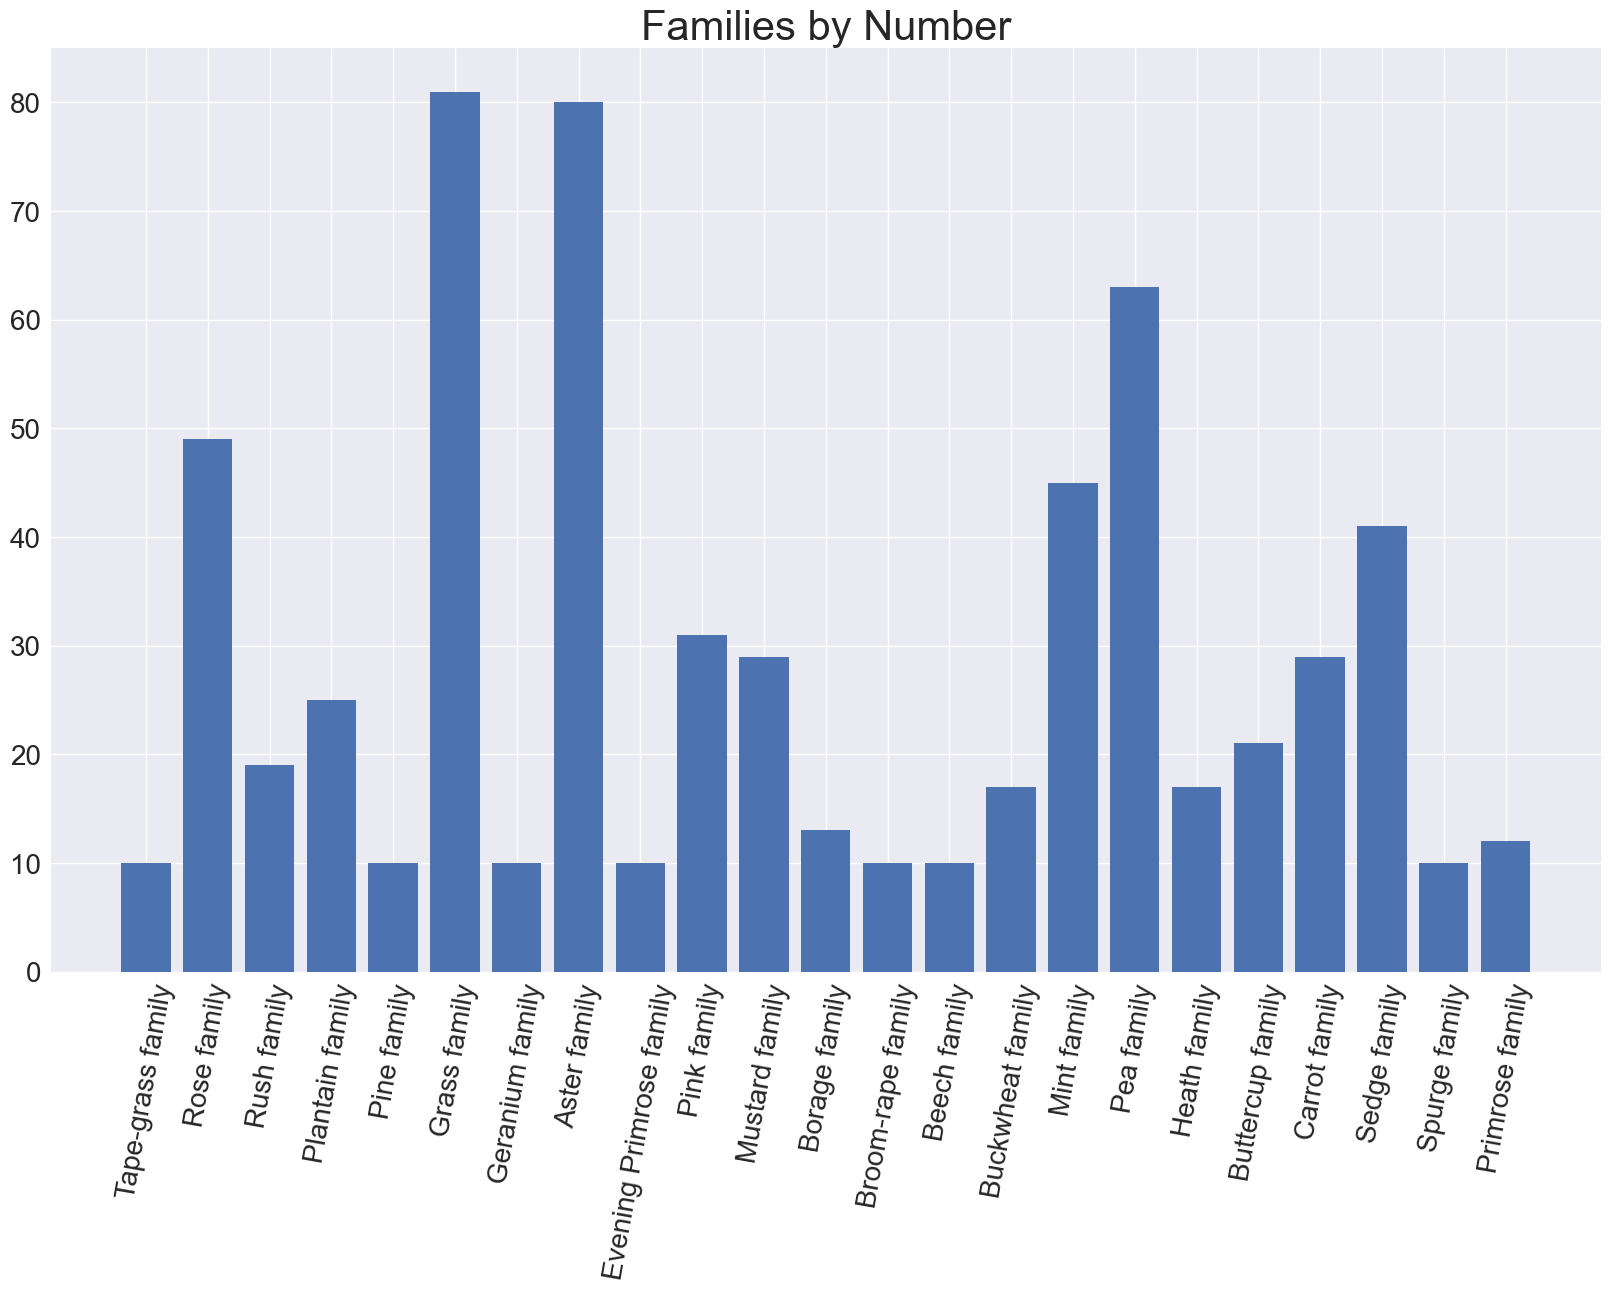

In [50]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.bar(x=fam_names, height=fam_counts)
ax.set_title('Families by Number', fontsize=30)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=20);

In [ ]:
plant_dict[None]

In [52]:
# defaultdict library removes the value of what's in .pop but doesn't remove the actual key. So we have to do a `del plant_dict[None]` if we want to remove the key None from the dictionary as well
plant_dict.pop(None)
plant_dict[None]

0

In [ ]:
# What happened? Because of default dict.
plant_dict

In [ ]:
del plant_dict[None]

In [ ]:
plant_dict2.pop(None)
plant_dict2[None]

In [ ]:
plant_dict

## Synonyms

In [53]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

Suppose we wanted to know how many synonymous names were listed for each plant. We could grab this number with a list comprehension:

In [54]:
num_syn = [len(plant['synonyms']) for plant in plants]

In [55]:
max(num_syn)

342

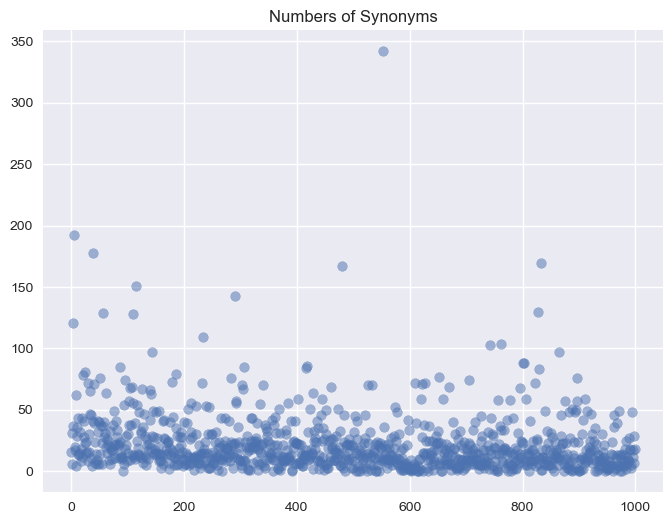

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(range(1000), num_syn, alpha=0.5)
ax.set_title('Numbers of Synonyms');

## Exercise

One plant has nearly 350 synonynms! What plant is this?

In [57]:
[plant["family_common_name"] for plant in plants if len(plant["synonyms"]) == max(num_syn)]

['Potato family']

<details>
    <summary>
        Answer
    </summary>

```python
[plant for plant in plants if len(plant['synonyms']) > 300]
```
</details>

## Bibliography

In [62]:
biblios = [plant['bibliography'] for plant in plants]

In [59]:
biblios[0]

'Encycl. 1: 723 (1785)'

Let's check the bibliographies for any explicit mention of Linnaeus, the godfather of biological taxonomy. First we'll remove the plants with no bibliography:

In [63]:
hasbiblio = [plant for plant in plants if plant['bibliography'] != None]

In [64]:
hasbiblio

[{'id': 678281,
  'common_name': 'Evergreen oak',
  'slug': 'quercus-rotundifolia',
  'scientific_name': 'Quercus rotundifolia',
  'year': 1785,
  'bibliography': 'Encycl. 1: 723 (1785)',
  'author': 'Lam.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Beech family',
  'genus_id': 5778,
  'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
  'synonyms': ['Quercus lyauteyi',
   'Quercus rotundifolia f. crassicupulata',
   'Quercus ballota',
   'Quercus ilex f. brevicupulata',
   'Quercus calycina',
   'Quercus rotundifolia f. dolichocalyx',
   'Quercus rotundifolia f. pilosella',
   'Quercus rotundifolia f. macrocarpa',
   'Quercus rotundifolia f. calycina',
   'Quercus ilex f. macrocarpa',
   'Quercus ilex subsp. ballota',
   'Quercus rotundifolia var. pilosella',
   'Quercus rotundifolia var. brevicupulata',
   'Quercus rotundifolia subsp. maghrebiana',
   'Quercus rotundifolia f. brevicupulata',
   'Quercus rotundifolia va

In [68]:
len(hasbiblio)
hasbiblio[5]

{'id': 137025,
 'common_name': 'Red fescue',
 'slug': 'festuca-rubra',
 'scientific_name': 'Festuca rubra',
 'year': 1753,
 'bibliography': 'Sp. pl. 1:74.  1753',
 'author': 'L.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Grass family',
 'genus_id': 1102,
 'image_url': 'https://bs.plantnet.org/image/o/0b932c8a275efc79f473a71bec20d6f15e9b6b90',
 'synonyms': ['Festuca rubra var. arenaria',
  'Bromus secundus',
  'Festuca kitaibeliana',
  'Festuca rubra var. lanuginosa',
  'Festuca michiganica',
  'Festuca pseudovivipara',
  'Festuca fallax',
  'Festuca rubra var. mediana',
  'Festuca ammobia',
  'Festuca aucta',
  'Festuca densiuscula',
  'Festuca vallicola',
  'Festuca ovina subsp. glauca',
  'Festuca calcarea',
  'Festuca rivularis subsp. pseudorivularis',
  'Festuca glauca',
  'Festuca heterophylla var. subheterophylla',
  'Festuca glabra',
  'Festuca oregona',
  'Festuca halleri',
  'Festuca iberica subsp. atlantigena',
  'Festuca clarkei',
  'Festuca alpestr

In [66]:
linnaeans = [plant['bibliography'] for plant in hasbiblio if 'Linnaeus' in plant['bibliography']]
linnaeans

['Linnaeus, C. (1753). Species plantarum, exhibentes plantas rite cognitas ad genera relatas cum differentiis specificis, nominibus trivialibus, synonymis selectis, locis natalibus, secundum systema sexuale digestas. Stockholm.']

# Matching Author and Bibliography

In fact, _Species Plantarum_ (1753) was written by Linnaeus, and "Sp. Pl." in these bibliographies is a reference to that master work. Let's check to see who the author is for these records whose bibliographies start with "Sp. Pl.":

In [71]:
sps = []
for plant in hasbiblio:
    if plant['bibliography'].startswith('Sp. Pl.'):
        sps.append(plant)

len(sps)

445

In [72]:
sps2 = []
for plant in hasbiblio:
    if "Sp. Pl." in plant['bibliography']:
        sps2.append(plant)

In [73]:
sps3 = []
for plant in hasbiblio:
    for check in ['Sp. Pl.', 'Linnaeus', 'Species plantarum']:
        if check in plant['bibliography']:
            sps3.append(plant)

In [74]:
len(sps)

445

In [75]:
len(sps2)

448

In [76]:
len(sps3)

450

In [77]:
sp_authors = [sp['author'] for sp in sps3]

In [78]:
sp_authors

['L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',

In [79]:
uniq_auth = list(set(sp_authors))
uniq_auth

[None,
 '(J.Presl & C.Presl) Parl.',
 'Willd.',
 'L.',
 'A.Haines (Linnaeus)',
 '(L.) L.']

In [80]:
uniq_auth[0]

In [81]:
counts = []
for author in uniq_auth:
    counts.append(sp_authors.count(author))

In [82]:
counts

[1, 1, 1, 444, 1, 2]

In [83]:
Counter(sp_authors)

Counter({'L.': 444,
         '(L.) L.': 2,
         '(J.Presl & C.Presl) Parl.': 1,
         'Willd.': 1,
         None: 1,
         'A.Haines (Linnaeus)': 1})

In [ ]:
dict(zip(uniq_auth, counts))

## Exercise

Change the author to 'L.' (for 'Linnaeus') for all of these records.

In [85]:
sps = []
for plant in hasbiblio:
    for check in ['Sp. Pl.', 'Linnaeus', 'Species plantarum', "L."]:
        if check in plant['bibliography']:
            sps.append(plant)
len(sps)

452

In [ ]:
sps = []
for plant in hasbiblio:
    for check in ['Sp. Pl.', 'Linnaeus', 'Species plantarum']:
        if check in plant['bibliography']:
            sps.append(plant)

In [ ]:
sp_authors = set([sp['author'] for sp in sps])
sp_authors

In [ ]:
len(sps)

In [88]:
for plant in hasbiblio:
    for check in ['Sp. Pl.', 'Linnaeus', 'Species plantarum', "L."]:
        if check in plant["bibliography"]:
            plant["author"] = "L."

In [89]:
Counter([plant["author"] for plant in hasbiblio])

Counter({'L.': 526,
         'Mill.': 14,
         'Hedwig': 12,
         'DC.': 10,
         'Huds.': 10,
         '(L.) P.Beauv.': 7,
         'Ehrh.': 7,
         'W.P.Schimper': 7,
         '(L.) Scop.': 6,
         'Moench': 5,
         '(L.) R.Br.': 5,
         'Scop.': 5,
         'Schreb.': 4,
         '(L.) Holub': 4,
         '(L.) Hill': 4,
         '(L.) Moench': 4,
         'Poir.': 4,
         '(L.) Roth': 4,
         '(L.) Mill.': 4,
         '(L.) Besser': 4,
         '(L.) Huds.': 4,
         'Lam.': 3,
         'Jacq.': 3,
         '(L.) Gaertn.': 3,
         'Roth': 3,
         '(L.) L.': 3,
         'Cav.': 3,
         '(L.) Clairv.': 3,
         'Willd.': 3,
         'Labill.': 3,
         'Medik.': 3,
         '(L.) Delarbre': 3,
         'Opiz': 3,
         'Warnstorf': 3,
         'Retz.': 3,
         'Bridel': 3,
         '(L.) Rich.': 3,
         'Aiton': 2,
         '(L.) U.Manns & Anderb.': 2,
         '(L.) Roem. & Schult.': 2,
         'All.': 2,
         

<details>
    <summary>
        Answer
    </summary>

```python
for plant in plants:
    try:
        for check in ['Sp. Pl.', 'Linnaeus', 'Species plantarum']:
            if check in plant['bibliography']:
                plant['author'] = 'L.'
    except:
        continue
```
</details>

# Teaser: Bringing in `pandas`: Back to Synonyms

Let's take advantage of the DataFrame tools from `pandas`:

In [90]:
# Need to first import pandas
import pandas as pd

In [91]:
plants_df = pd.DataFrame(plants)

In [107]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

In [93]:
plants_df.head()

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links
0,678281,Evergreen oak,quercus-rotundifolia,Quercus rotundifolia,1785.0,Encycl. 1: 723 (1785),Lam.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/1a03948baf0300...,"[Quercus lyauteyi, Quercus rotundifolia f. cra...",Quercus,Fagaceae,{'self': '/api/v1/species/quercus-rotundifolia...
1,190500,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028,https://bs.plantnet.org/image/o/85256a1c2c098e...,"[Urtica major, Urtica tibetica, Urtica sicula,...",Urtica,Urticaceae,"{'self': '/api/v1/species/urtica-dioica', 'pla..."
2,126957,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284,https://bs.plantnet.org/image/o/428f40dadfa028...,"[Koeleria dactylis, Festuca glomerata, Trachyp...",Dactylis,Poaceae,"{'self': '/api/v1/species/dactylis-glomerata',..."
3,167888,Narrowleaf plantain,plantago-lanceolata,Plantago lanceolata,1753.0,Sp. Pl.: 113 (1753),L.,accepted,species,Plantain family,5418,https://bs.plantnet.org/image/o/78a8374f009e6e...,"[Plantago lanceolata var. sphaerostachya, Plan...",Plantago,Plantaginaceae,{'self': '/api/v1/species/plantago-lanceolata'...
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla..."


In [103]:
# Do this same execise but with the pandas 
# normalize=True means it will give a percentage of how much that value makes up of the total data (common_name1 takes up % of total family_common_names)
counts = plants_df["family_common_name"].value_counts(ascending=False, normalize=True)
list(counts.index)
list(counts.values)

[0.09131905298759865,
 0.09019165727170236,
 0.07102593010146561,
 0.0552423900789177,
 0.05073280721533258,
 0.046223224351747465,
 0.03494926719278467,
 0.03269447576099211,
 0.03269447576099211,
 0.02818489289740699,
 0.02367531003382187,
 0.02142051860202931,
 0.019165727170236752,
 0.019165727170236752,
 0.014656144306651634,
 0.013528748590755355,
 0.011273957158962795,
 0.011273957158962795,
 0.011273957158962795,
 0.011273957158962795,
 0.011273957158962795,
 0.011273957158962795,
 0.011273957158962795,
 0.010146561443066516,
 0.010146561443066516,
 0.010146561443066516,
 0.009019165727170236,
 0.009019165727170236,
 0.009019165727170236,
 0.007891770011273957,
 0.007891770011273957,
 0.007891770011273957,
 0.007891770011273957,
 0.007891770011273957,
 0.007891770011273957,
 0.007891770011273957,
 0.006764374295377677,
 0.006764374295377677,
 0.005636978579481398,
 0.005636978579481398,
 0.005636978579481398,
 0.005636978579481398,
 0.004509582863585118,
 0.004509582863585118,


In [94]:
plants_df.loc[plants_df['author'] == "L."]

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links
1,190500,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028,https://bs.plantnet.org/image/o/85256a1c2c098e...,"[Urtica major, Urtica tibetica, Urtica sicula,...",Urtica,Urticaceae,"{'self': '/api/v1/species/urtica-dioica', 'pla..."
2,126957,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284,https://bs.plantnet.org/image/o/428f40dadfa028...,"[Koeleria dactylis, Festuca glomerata, Trachyp...",Dactylis,Poaceae,"{'self': '/api/v1/species/dactylis-glomerata',..."
3,167888,Narrowleaf plantain,plantago-lanceolata,Plantago lanceolata,1753.0,Sp. Pl.: 113 (1753),L.,accepted,species,Plantain family,5418,https://bs.plantnet.org/image/o/78a8374f009e6e...,"[Plantago lanceolata var. sphaerostachya, Plan...",Plantago,Plantaginaceae,{'self': '/api/v1/species/plantago-lanceolata'...
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla..."
5,137025,Red fescue,festuca-rubra,Festuca rubra,1753.0,Sp. pl. 1:74. 1753,L.,accepted,species,Grass family,1102,https://bs.plantnet.org/image/o/0b932c8a275efc...,"[Festuca rubra var. arenaria, Bromus secundus,...",Festuca,Poaceae,"{'self': '/api/v1/species/festuca-rubra', 'pla..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,170694,Norwegian cinquefoil,potentilla-norvegica,Potentilla norvegica,1753.0,Sp. Pl.: 499 (1753),L.,accepted,species,Rose family,618,https://bs.plantnet.org/image/o/e0cafb7c39026c...,"[Potentilla monspeliensis, Potentilla norvegic...",Potentilla,Rosaceae,{'self': '/api/v1/species/potentilla-norvegica...
987,191418,Green field speedwell,veronica-agrestis,Veronica agrestis,1753.0,Sp. Pl.: 13 (1753),L.,accepted,species,Plantain family,3419,https://bs.plantnet.org/image/o/6e8fe06255953c...,"[Pocilla agrestis, Cochlidiosperma agreste, Ve...",Veronica,Plantaginaceae,"{'self': '/api/v1/species/veronica-agrestis', ..."
991,239777,Alpine thistle,carduus-defloratus,Carduus defloratus,1759.0,Syst. Nat. ed. 10 2: 1200 (1759),L.,accepted,species,Aster family,1461,https://bs.plantnet.org/image/o/b36c24b92180cd...,"[Carduus carlinifolius, Carduus crassifolius, ...",Carduus,Asteraceae,"{'self': '/api/v1/species/carduus-defloratus',..."
993,178677,Rock soapwort,saponaria-ocymoides,Saponaria ocymoides,1753.0,Sp. Pl.: 409 (1753),L.,accepted,species,Pink family,3342,https://bs.plantnet.org/image/o/3a6df46121e90a...,"[Silene ocymoides, Silene alsinoides, Saponari...",Saponaria,Caryophyllaceae,{'self': '/api/v1/species/saponaria-ocymoides'...


## Exercises for Later

1. Add the number of synonyms as a new column called "num_syn".
2. Sort the DataFrame by number of synonyms in descending order.
3. Grab the Image URL of the plant that has the fourth-highest number of synonyms.
4. Paste it into your browser and take a look!

In [121]:
# Add number of synonyms as new col "num_syn"

for plant in plants:
    plant["num_syn"] = len(plant["synonyms"])

plants_df = pd.DataFrame(plants)
counts = plants_df["num_syn"].value_counts(ascending=False)

image_url = plants_df.loc[plants_df["image_url"] == counts[3]]

print(counts)
print(image_url)




num_syn
8      43
12     41
3      40
9      40
13     37
       ..
65      1
151     1
128     1
178     1
170     1
Name: count, Length: 98, dtype: int64
Empty DataFrame
Columns: [id, common_name, slug, scientific_name, year, bibliography, author, status, rank, family_common_name, genus_id, image_url, synonyms, genus, family, links, num_syn]
Index: []


<details>
    <summary>Answer here
    </summary>

```python
plants_df['num_syn'] = plants_df['synonyms'].map(len)
sorted = plants_df.sort_values('num_syn', ascending=False)
sorted.loc[3, 'image_url']
```
</details>

# Year

The year is an indication of when a valid name for the plant first appeared in print. Let's build a simple histogram of these years:

In [ ]:
fig, ax = plt.subplots()

ax.hist(plants_df[plants_df['year'] > 0]['year'], color='darkgreen');

## Exercise

How many plants have first been written about just in the last 20 years? Make a bar chart or pie chart that shows the distribution by family of these plants.

<details>
    <summary>
        One answer here
    </summary>

```python
recent = plants_df[plants_df['year'] >= 2001]
fig, ax = plt.subplots(1, 2, figsize=(14, 6)
ax[0].bar(recent['family_common_name'].value_counts().index,
       recent['family_common_name'].value_counts(),
      color='darkgreen')
ax[1].pie(recent['family_common_name'].value_counts(),
      labels=recent['family_common_name'].value_counts().index,
      radius=1.2, labeldistance=0.4, rotatelabels=True);
```    
</details>